[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [ ]:
!pip install -U torch sahi yolov5

In [ ]:
import os
os.getcwd()

- Import required modules:

In [1]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi.model import Yolov5DetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [2]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = 'models/yolov5s6.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [3]:
detection_model = Yolov5DetectionModel(
    model_path=yolov5_model_path,
    prediction_score_threshold=0.3,
    device="cpu", # or 'cuda'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [5]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

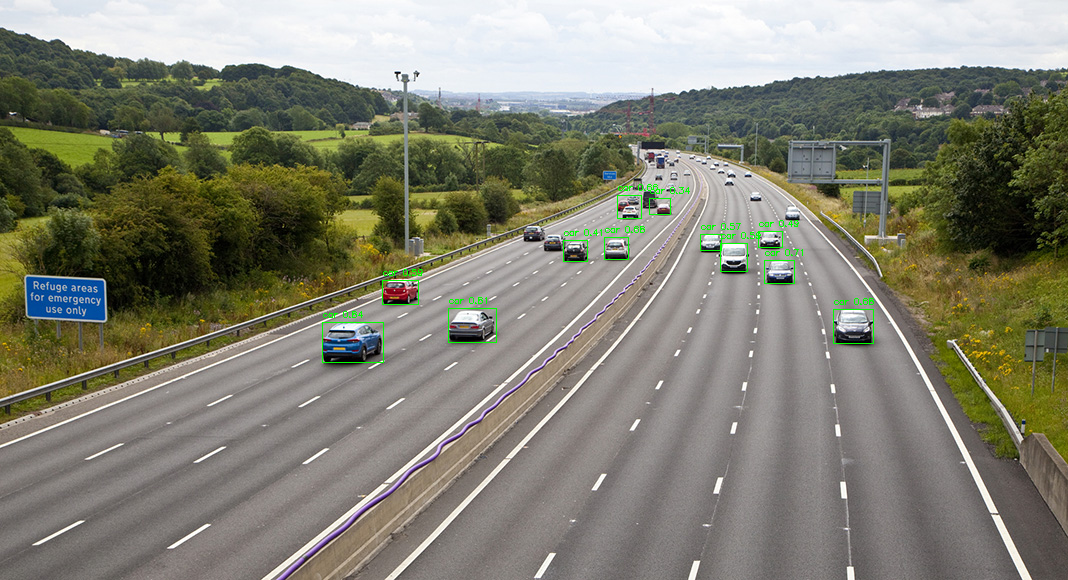

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [5]:
result = get_sliced_prediction(
    image,
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Number of slices: 18


- Visualize predicted bounding boxes and masks over the original image:

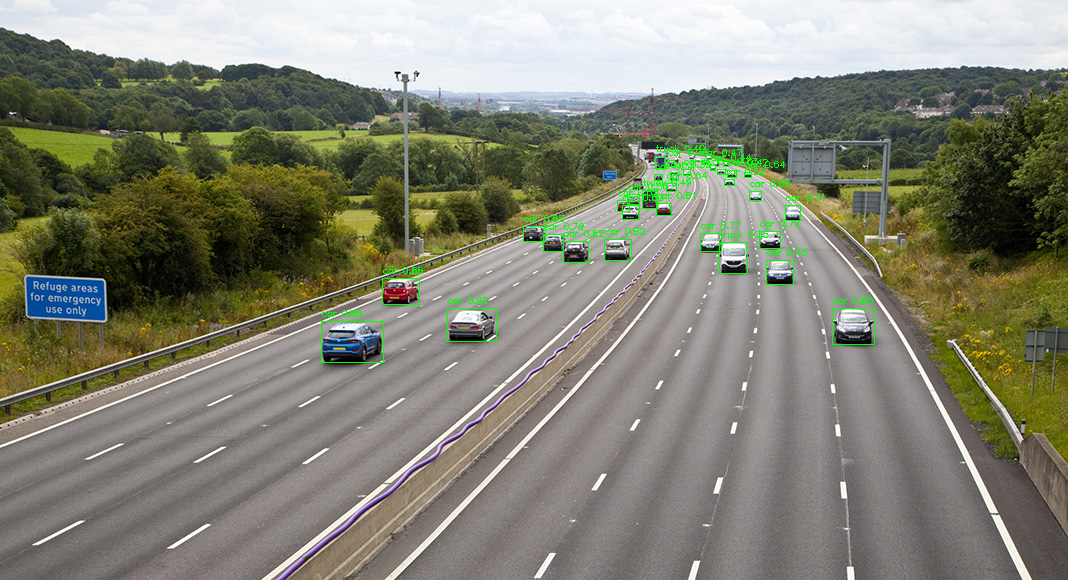

In [16]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [6]:
object_prediction_list = result.object_prediction_list

In [7]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447, 308, 496, 341), w: 49, h: 33>,
    mask: None,
    score: PredictionScore: <value: 0.9154346585273743>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [9]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447, 308, 49, 33],
  'score': 0.9154346585273743,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1617},
 {'image_id': None,
  'bbox': [321, 321, 62, 41],
  'score': 0.887986958026886,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2542},
 {'image_id': None,
  'bbox': [382, 278, 37, 26],
  'score': 0.8796938061714172,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 962}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [10]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447, 308, 49, 33],
  'score': 0.9154346585273743,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1617},
 {'image_id': 1,
  'bbox': [321, 321, 62, 41],
  'score': 0.887986958026886,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2542},
 {'image_id': 1,
  'bbox': [382, 278, 37, 26],
  'score': 0.8796938061714172,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 962}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [7]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [8]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '60d90c8434bbe92b2db13f26',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.41853932584269665,
         0.5310344827586206,
         0.04588014981273408,
         0.056896551724137934,
     ]),
     'mask': None,
     'confidence': 0.9154346585273743,
     'index': None,
 }>,
 <Detection: {
     'id': '60d90c8434bbe92b2db13f27',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.300561797752809,
         0.553448275862069,
         0.05805243445692884,
         0.0706896551724138,
     ]),
     'mask': None,
     'confidence': 0.887986958026886,
     'index': None,
 }>,
 <Detection: {
     'id': '60d90c8434bbe92b2db13f28',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.35767790262172283,
         0.4793103448275862,
         0.03464419475

## 4. Batch Prediction

- Set model and directory parameters:

In [47]:
model_name = "Yolov5DetectionModel"
model_parameters = {
    "model_path": yolov5_model_path,
    "device": "cpu", # or 'cuda'
    "prediction_score_threshold":0.4,
}
apply_sliced_prediction = True
slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [48]:
predict(
    model_name=model_name,
    model_parameters=model_parameters,
    source=source_image_dir,
    apply_sliced_prediction=apply_sliced_prediction,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 2 listed files in folder .


  0%|          | 0/2 [00:00<?, ?it/s]

Number of slices: 20


 50%|█████     | 1/2 [00:00<00:00,  1.79it/s]

Number of slices: 18


100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

Model loaded in 0.3756110668182373 seconds.
Slicing performed in 0.006395101547241211 seconds.
Prediction performed in 0.9911887645721436 seconds.
Exporting performed in 0.030394792556762695 seconds.
